Importing nessesary packages

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

First we will load the D31 dataset

In [192]:
data = []
file = open("./data/D31.txt")
for line in file:
    data_point = line.split()
    for i in range(0, len(data_point)):
        data_point[i] = float(data_point[i])
    data_point_rounded = np.round(data_point, 1)
    data.append(data_point_rounded[:-1])

min_max_scaler = preprocessing.MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(data)

Let's visualize the dataset

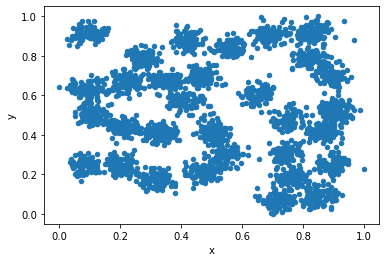

In [193]:
df = pd.DataFrame(data_normalized, columns=['x', 'y'])
ax1 = df.plot.scatter(x='x',
                     y='y')
plt.show()

In [194]:
# function to calculate euclidian distance
def calculate_euc_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)

# function to calculate manhatten distance. used to get closest neighbours
def man_distance(node1_row, node1_col, node2_row, node2_col):
  return np.abs(node1_row-node2_row) + np.abs(node1_col-node2_col)

def winning_node(data, data_index, som_map, map_rows, map_cols):
    node = (0,0)
    smallest_dist = 1000000
    for i in range(map_rows):
        for j in range(map_cols):
            euc_dist = calculate_euc_distance(som_map[i][j], data[data_index])
            if euc_dist < smallest_dist:
                smallest_dist = euc_dist
                node = (i, j)
    return node

def neighbourhood_kernal(distance, nhood_size):
    return np.exp(-(pow(distance, 2) / 2 * pow(nhood_size, 2)))


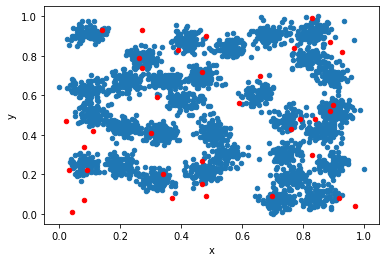

In [195]:
# define SOM row and col size
Rows = 6
Cols = 6
# create a 10x10 map of 2D nodes with a random value between 0-1
map = np.random.random_sample(size=(Rows,Cols,2))

initial_weights = []
for row in range(Rows):
    for col in range(Cols):
        weight = np.ndarray.round(map[row][col], decimals=2)
        initial_weights.append(weight)


map_df = pd.DataFrame(initial_weights, columns=['x', 'y'])
first_plot = df.plot.scatter(x='x', y='y')
map_df.plot.scatter(x='x', y='y', ax=first_plot, c='red')
# som_df.plot.line(x=0, y=1, ax=ax2, style='b')
plt.show()

Train the network

In [196]:
epochs = 5000
max_neighbourhood_size = 12
max_learning_rate = 0.5

for e in range(epochs):
    # calculate neighbourhood size. this will decrease with number of iterations
    neighbourhood_size = max_neighbourhood_size * np.exp(-e / epochs)
    # calculate learning rate. also decreases with number of iterations
    learning_rate = max_learning_rate * np.exp( -e / epochs)

    # choose random index from input data list
    index = np.random.randint(len(data_normalized))
    # get winning node
    winning_node_row, winning_node_col = winning_node(data_normalized, index, map, Rows, Cols)
    # update w of the winning node and neighbours
    for row in range(Rows):
        for col in range(Cols):
            distance_between_nodes = man_distance(winning_node_row, winning_node_col, row, col)
            if distance_between_nodes < neighbourhood_size:
                neighbourhood_kernal_val = neighbourhood_kernal(distance_between_nodes, neighbourhood_size)
                # updating weights of nodes
                map[row][col] = map[row][col] + learning_rate * neighbourhood_kernal_val * (data_normalized[index] - map[row][col])


print("SOM training completed")
print(map)


SOM training completed
[[[0.08427649 0.24466915]
  [0.56924077 0.8587789 ]
  [0.90626125 0.51065085]
  [0.72630827 0.16514665]
  [0.26946499 0.930855  ]
  [0.22195571 0.23450431]]

 [[0.32011764 0.1483872 ]
  [0.11381286 0.54836147]
  [0.20485122 0.65700016]
  [0.85733917 0.08071088]
  [0.29959283 0.2011883 ]
  [0.17195056 0.27603713]]

 [[0.69324304 0.90176334]
  [0.71925388 0.06105453]
  [0.93689278 0.55380762]
  [0.46641647 0.69685399]
  [0.74063101 0.45203317]
  [0.80419509 0.18399701]]

 [[0.82883997 0.91689442]
  [0.89966154 0.70067531]
  [0.40397944 0.59121164]
  [0.08001781 0.06828747]
  [0.90208357 0.23544811]
  [0.04422323 0.00879746]]

 [[0.80706456 0.79783952]
  [0.41206337 0.86882048]
  [0.2872978  0.78254385]
  [0.54861267 0.300349  ]
  [0.09490744 0.90670426]
  [0.86697009 0.41191905]]

 [[0.22083373 0.43069761]
  [0.75395283 0.29480705]
  [0.45242184 0.21082071]
  [0.51812056 0.4146975 ]
  [0.65038783 0.60963235]
  [0.32219342 0.41001116]]]


       x     y
0   0.08  0.24
1   0.57  0.86
2   0.91  0.51
3   0.73  0.17
4   0.27  0.93
5   0.22  0.23
6   0.32  0.15
7   0.11  0.55
8   0.20  0.66
9   0.86  0.08
10  0.30  0.20
11  0.17  0.28
12  0.69  0.90
13  0.72  0.06
14  0.94  0.55
15  0.47  0.70
16  0.74  0.45
17  0.80  0.18
18  0.83  0.92
19  0.90  0.70
20  0.40  0.59
21  0.08  0.07
22  0.90  0.24
23  0.04  0.01
24  0.81  0.80
25  0.41  0.87
26  0.29  0.78
27  0.55  0.30
28  0.09  0.91
29  0.87  0.41
30  0.22  0.43
31  0.75  0.29
32  0.45  0.21
33  0.52  0.41
34  0.65  0.61
35  0.32  0.41


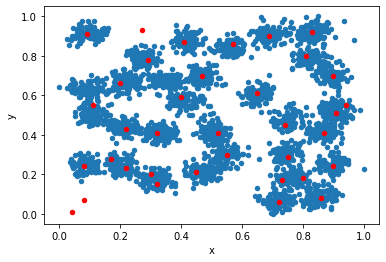

In [198]:
weights = []
for row in range(Rows):
    for col in range(Cols):
        weight = np.ndarray.round(map[row][col], decimals=2)
        weights.append(weight)


som_df = pd.DataFrame(weights, columns=['x', 'y'])
print(som_df)

first_plot = df.plot.scatter(x='x', y='y')
som_df.plot.scatter(x='x', y='y', ax=first_plot, c='red')
# som_df.plot.line(x=0, y=1, ax=ax2, style='b')
plt.show()

